<a href="https://colab.research.google.com/github/abhimanyubhowmik/Introduction-to-Deep-Learning-CSE321/blob/main/Lab%204/Backpropagation_Class_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import *

In [ ]:
def Z_op(X,W,B):
    Z = np.dot(W,X.T) + B
    return Z

def Y_op(Tf,*Z):
    Yout = []
    for z in Z:
        y = Tf(z)
        Yout.append(y)
    return np.array(Yout)

def Cost(Y,T):
    errors = T - Y
    SSE = 0
    for error in errors:
        SSE = SSE + error*error
    MSE = SSE/len(errors)
    return MSE

In [ ]:
def feed_forward(W,B,X,Tf_list):
    Z_list = []
    X_list = []
    X_list.append(X)
    for i,j,k in zip(range(len(W)),range(len(B)),range(len(Tf_list))):
        z = Z_op(X,W[i],B[j])
        Z_list.append(z)
        y = Y_op(Tf_list[k],z)
        X = y
        X_list.append(X)
    return Z_list,X_list

In [ ]:
def sensitivity(Z_list,X_list,F_prime,Target,Weights):
    F_list = []
    Sn_list = []
    for i in range(len(Z_list)):
        D = []
        for k in Z_list[i]:
            d = F_prime[i](k)
            D.append(d)
        Dag = np.array(D)
        F_dot = np.diag(Dag)
        F_list.append(F_dot)
    F_n = F_list.pop(len(F_list)-1)
    A_n = X_list.pop(len(X_list)-1)
    error = Target - A_n
    S_n = np.array(-2*np.dot(F_n,error.T))
    Sn_list.append(S_n)
    for i in range(len(F_list),0,-1):
        F_dot_W = np.array(np.dot(F_list[i-1],Weights[i].T))
        S_n = F_dot_W*S_n
        Sn_list.append(S_n.T)
    return Sn_list


In [ ]:
def weight_bias_updation(Weight,Bias,Alpha,Sensitivity,X_List):
    new_weights = []
    new_bias = []
    def reshaping(vector):
      if vector.shape == (len(vector),1):
        return vector.reshape(len(vector),)
      elif vector.shape == (1,len(vector[0])):
        return vector.reshape(len(vector[0]),)
      else :
        return vector
    def Reverse(lst):
        return [ele for ele in reversed(lst)]
    sens = Reverse(Sensitivity)

    for i in range(len(Weight)):
        delta_w = reshaping(Alpha*sens[i]*X_List[i].T)
        w = Weight[i] - delta_w #As a(1) = X[0], The loop will run for w[0],w[1]...w[n-1], which we will use as w1,w2...wn
        new_weights.append(w)
    for i in range(len(Bias)):
        b = Bias[i] - reshaping(Alpha*sens[i])
        new_bias.append(b)
    return new_weights,new_bias

In [ ]:
def Error_Collection(Target,Output,All_Errors):
  Error = Cost(Output,Target)
  All_Errors.append(Error)

In [ ]:
def backpropagation(Weight,Bias,Pattern,Target,Alpha,Transfer_Function,F_Prime,Epoch):
  all_errors = []
  epoch_list = []
  for i in range(Epoch):
      zl,xl = feed_forward(Weight,Bias,Pattern,Transfer_Function)
      actual_output = xl[len(xl)-1]
      Error_Collection(Target,actual_output,all_errors)
      sen = sensitivity(zl,xl,F_Prime,Target,Weight)
      Weight,Bias = weight_bias_updation(Weight,Bias,Alpha,sen,xl)
      epoch_list.append(i+1)
  plt.scatter(epoch_list,all_errors)
  plt.xlabel('Number of Epoch')
  plt.ylabel('Mean Square Error')
      

In [ ]:
def input_velues():
  num_layers = int(input('Enter number of layers'))
  num_nurons = []
  Tf_list = []
  F_prime = []
  W = []
  B = []
  X = []
  T = []
  print('\n')
  for num in range(num_layers):
    print('Enter numbers of nurons in layer {number}'.format(number = num))
    num_nuron = int(input())
    num_nurons.append(num_nuron)
  print('Enter mathametical expression with respect to variable x.\n The variable should be continous, differntiable and use the proper Latex notation for each expression.\n')
  for num in range(num_layers - 1):
    f_exp = input('Enter Expression for transfer function of layer {number} :'.format(number = num + 1))
    x = Symbol('x')
    f = lambdify(x,f_exp)
    f_prime_exp = diff(f_exp)
    f_prime = lambdify(x,f_prime_exp)
    Tf_list.append(f)
    F_prime.append(f_prime)

  def reshaping(vector):
    if type(vector[0]) == np.float64:
      return vector
    else:
      if vector.shape == (len(vector),1):
        return vector.reshape(len(vector),)
      elif vector.shape == (1,len(vector[0])):
        return vector.reshape(len(vector[0]),)
      else :
        return vector

  for i in range(len(num_nurons)-1):
    w = np.random.rand(num_nurons[i+1],num_nurons[i])
    b = np.random.rand(num_nurons[i+1])
    W.append(w)
    B.append(b)
  new_w = []
  new_b = []
  for w in W:
    w = reshaping(w)
    new_w.append(w)
  for b in B:
    b = reshaping(b)
    new_b.append(b)
  W = new_w
  B = new_b
  print('\n')
  print('Enter the list of patterns:')
  pattern_input = input()
  X = globals()[pattern_input]
  print('Enter the target:')
  target_input = input()
  T = globals()[target_input]
  X = np.array(X)
  T = np.array(T)
  alpha = float(input('Enter the learning rate :'))
  epoch = int(input('Enter the number of epoch :'))
  return W,B,Tf_list,F_prime,X,T,alpha,epoch


In [ ]:
def main():
  W,B,Tf_list,F_prime,X,Target,alpha,epoch = input_velues()
  print('\nInitial Weights:')
  print(W)
  print('\nInitial Biases:')
  print(B)
  print('\n')
  backpropagation(W,B,X,Target,alpha,Tf_list,F_prime,epoch)

In [ ]:
def g(p):
  return 1 + np.sin(np.pi /4 * p)

In [ ]:
inp = np.random.uniform(-2,2)

In [ ]:
out = g(inp)

Enter number of layers3


Enter numbers of nurons in layer 0
1
Enter numbers of nurons in layer 1
2
Enter numbers of nurons in layer 2
1
Enter mathametical expression with respect to variable x.
 The variable should be continous, differntiable and use the proper Latex notation for each expression.

Enter Expression for transfer function of layer 1 :1/(1+exp(-x))
Enter Expression for transfer function of layer 2 :x


Enter the list of patterns:
inp
Enter the target:
out
Enter the learning rate :0.1
Enter the number of epoch :20

Initial Weights:
[array([0.0947529 , 0.84021158]), array([0.80481027, 0.86641559])]

Initial Biases:
[array([0.1451077 , 0.95766091]), array([0.14997464])]




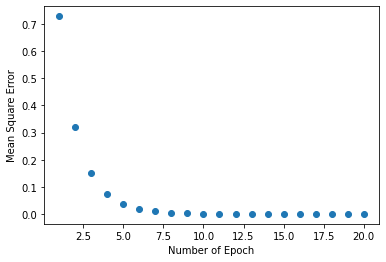

In [ ]:
main()